## Project Description

As part of Udacity Data Analyst Nanodegree program, I will be working on a dog's dataset that is split in three different data-source formats. 

Working on this project will require gathering data from the three different data sources. After gathering, wrangle it and then analyse it to make findings.

1. [Data Gathering](#data_gathering)
2. [Assess Data](#data_assess)
3. [Data Cleaning](#data_cleaning)
4. [Data Storage](#data_storing)
5. [Data Analysis & Visualization](#data_analysis)
6. [Conclusions](#conclusions)
7. [Limitations](#limitations)
8. [References](#references)

The process is as follows:
1. Data Gathering: The goal is to gather all the three pieces of datasets. The provided dataset in csv format, twitter dataset through querying Twitter API and finally pragmatically through requests of the image prediction dataset.
2. Assess: After gathering the data, assess it to check its quality and tidiness. This will be done both visually and programmatically for replicability. Any data that falls into the low quality and messy category is highly unwanted and effort must be put to clean it.
3. Clean: After noting what needs to be cleaned in the assessment phase, effort is applied in this phase to remove the unwanted characteristics whether by transformation or dropping data points
4. Analyze: After cleaning, the data is analyzed with the goal of answering posed questions or observations through charting or calculations.
5. Conclusions: Report findings found after analysing the cleaned data.
 
Will be extracting data from WeRateDogs dataset. WeRateDogs is a Twitter account that rates people's dogs with humorous comments about the dogs. WeRateDogs has over 4 million followers and has received international media coverage.


<a id='data_gathering'></a>
## 1. Data Gathering

In this section, the goal is to gather all the three pieces of datasets. The provided dataset in csv format, twitter dataset through querying Twitter API and finally pragamatically through requests of the image prediction dataset.

In [1]:
# Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import tweepy 
import requests
import json

from bs4 import BeautifulSoup
from timeit import default_timer as timer

import re

### Datasource 1: Access the Enhanced Twitter Archive Dataset stored in a csv format

In [2]:
df_enhanced = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
df_enhanced.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### Datasource 2: Querying WeRateDogs Dataset from Twitter through the Twitter API

Authenticate and connect to Twitter API

In [4]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

# Authenticate
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


To only access tweet datapoints for the existing tweets in the twitter enhanced archive dataset, "df_enhanced dataframe", will be matching the tweet_id column values against those extracting from Twitter through the API. 

In [5]:
tweet_ids = df_enhanced.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
        
end = timer()

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Rate limit reached. Sleeping for: 104


Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success
933: 754011816964026368
Fail
934: 753655901052166144
Success
935: 753420520834629632
Success
936: 753398408988139520
Success
937

Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
1182: 719332531645071360
Success
1183: 718971898235854848
Success
1184: 718939241951195136
Success
1185: 718631497683582976
Success
1186: 718613305783398402
Success
1187: 718540630683709445
Success
11

Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
1431: 697575480820686848
Success
1432: 697516214579523584
Success
1433: 697482927769255936
Success
1434: 697463031882764288
Success
1435: 697270446429966336
Success
1436: 697259378236399616
Success
14

Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
1680: 682032003584274432
Success
1681: 682003177596559360
Success
1682: 681981167097122816
Success
1683: 681891461017812993
Success
1684: 681694085539872773
Success
1685: 681679526984871937
Success
16

Rate limit reached. Sleeping for: 89


Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
1832: 676215927814406144
Success
1833: 676191832485810177
Success
1834: 676146341966438401
Success
1835: 676121918416756736
Success
1836: 676101918813499392
Success
1837: 676098748976615425
Success
18

Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
2080: 670826280409919488
Success
2081: 670823764196741120
Success
2082: 670822709593571328
Success
2083: 670815497391357952
Success
2084: 670811965569282048
Success
2085: 670807719151067136
Success
2086: 670804601705242624
Success
20

Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
2329: 666396247373291520
Success
2330: 666373753744588802
Success
2331: 666362758909284353
Success
2332: 666353288456101888
Success
2333: 666345417576210432
Success
2334: 666337882303524864
Success
2335: 666293911632134144
Success
23

Checking whether there are any datapoints in the "fails_dict" which would mean there tweets in the enhanced dataframe which didn't match against the tweets extracted from Twitter. This could point to a situation where a tweet was deleted, banned or other reasons.

In [6]:
fails_dict

{888202515573088257: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
 873697596434513921: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
 872668790621863937: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
 872261713294495745: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
 869988702071779329: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
 866816280283807744: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
 861769973181624320: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
 856602993587888130: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
 856330835276025856: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
 851953902622658560: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
 851861385

It seems there are tweets that didn't match those from the API

In [7]:
# Append the extracted tweets in a list
listoftweets = []
with open('tweet_json.txt','r') as file:
    for i in file:
        tweets = json.loads(i)
        listoftweets.append(tweets) 
        
listoftweets[0]        

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

In [8]:
# Extract just the necessary data from the tweet data extracted via the API
df_addtweetdata = pd.DataFrame(listoftweets)
df_addtweetdata = df_addtweetdata[['id','geo','retweet_count','favorite_count']]

In [9]:
df_addtweetdata.head()

,id,geo,retweet_count,favorite_count
0,892420643555336193,None,6961,33657
1,892177421306343426,None,5265,29194
2,891815181378084864,None,3463,21955
3,891689557279858688,None,7183,36744
4,891327558926688256,None,7707,35103


###  Datasource 3: Extracting Tweet Image Predictions using the Requests Library

In [10]:
# Extract the tweet image predictions dataset
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save HTML to file
with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)
  
df_imagepred = pd.read_csv("image-predictions.tsv", sep='\t')

In [11]:
df_imagepred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<a id='data_assess'></a>
## 2. Assess the Datasets

The Goal here is to have a look at three datasets and gain a better perspective of how the data looks like. Plus check for the obvious things like missing values, duplicate records etc. In short, assess the data for Tidiness and Dirtiness visually and pragmattically. 

### Datasource 1: Image Predictions Dataset

> Visual Assessment

In [12]:
df_imagepred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1730,821044531881721856,https://pbs.twimg.com/media/C2Tvo20XcAAhNL9.jpg,1,Old_English_sheepdog,0.148020,True,Airedale,0.133534,True,Tibetan_mastiff,0.120903,True
1079,717841801130979328,https://pbs.twimg.com/media/CfZJTphWAAAl5Ys.jpg,1,Brittany_spaniel,0.922876,True,English_springer,0.070113,True,bath_towel,0.002561,False
246,670474236058800128,https://pbs.twimg.com/media/CU4AwqQWUAAEgE2.jpg,1,wool,0.070076,False,siamang,0.062536,False,gorilla,0.058894,False
1570,794926597468000259,https://pbs.twimg.com/media/CwglhZVXgAAc3_w.jpg,1,teddy,0.569566,False,bath_towel,0.173745,False,toy_poodle,0.037662,True
718,685667379192414208,https://pbs.twimg.com/media/CYP62A6WkAAOnL4.jpg,1,sliding_door,0.344526,False,doormat,0.190027,False,washbasin,0.046326,False
416,674019345211760640,https://pbs.twimg.com/media/CVqZBO8WUAAd931.jpg,1,collie,0.992732,True,borzoi,0.005043,True,Shetland_sheepdog,0.001725,True
156,668826086256599040,https://pbs.twimg.com/media/CUglxbFXAAA5O0d.jpg,1,malinois,0.640185,True,Irish_terrier,0.153700,True,Rhodesian_ridgeback,0.068457,True
1306,753398408988139520,https://pbs.twimg.com/ext_tw_video_thumb/75339...,1,whippet,0.163794,True,Italian_greyhound,0.157192,True,English_foxhound,0.142995,True
1899,851224888060895234,https://pbs.twimg.com/media/C9AohFoWsAUmxDs.jpg,3,car_mirror,0.971512,False,seat_belt,0.007063,False,standard_poodle,0.005683,True
1110,724004602748780546,https://pbs.twimg.com/media/CgwuWCeW4AAsgbD.jpg,3,Siamese_cat,0.950526,False,pug,0.018877,True,quilt,0.007628,False


> Programmatic Assessment

In [13]:
# Rows and Columns
df_imagepred.shape

(2075, 12)

In [14]:
# Duplicate Records
df_imagepred.duplicated().sum()

0

In [15]:
# Missing Values/NaN
df_imagepred.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [16]:
# Assess Datatypes
df_imagepred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
# Assess Statistics
df_imagepred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Datasource 2: Enhanced Twitter Archive Dataset

> Visual Assessment

In [18]:
df_enhanced.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1877,675109292475830276,NaN,NaN,2015-12-11 00:26:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",C'mon guys. We've been over this. We only rate...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675109292...,9,10,a,None,None,None,None
2173,669324657376567296,NaN,NaN,2015-11-25 01:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Ralf. He's a miniature Buick DiCaprio. Ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669324657...,11,10,Ralf,None,None,None,None
1561,688385280030670848,NaN,NaN,2016-01-16 15:40:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Louis. He's takes top-notch selfies. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688385280...,12,10,Louis,None,None,None,None
1518,690932576555528194,NaN,NaN,2016-01-23 16:22:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Buddy. He's testing out the water. Suc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690932576...,12,10,Buddy,None,None,None,None
1790,677530072887205888,NaN,NaN,2015-12-17 16:45:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Axel. He's a Black Chevy Pinot on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677530072...,9,10,Axel,None,None,None,None
1976,672995267319328768,NaN,NaN,2015-12-05 04:25:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pumpkin. He can look in two different ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672995267...,8,10,Pumpkin,None,None,None,None
1461,694925794720792577,NaN,NaN,2016-02-03 16:49:55 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Please only send in dogs. This t-rex is very s...,NaN,NaN,NaN,https://vine.co/v/iJvUqWQ166L,5,10,None,None,None,None,None
480,815736392542261248,NaN,NaN,2017-01-02 01:48:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Akumi. It's his birthday. He received ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/815736392...,11,10,Akumi,None,None,None,None
1696,681242418453299201,NaN,NaN,2015-12-27 22:37:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Champ. He's being sacrificed to the Az...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681242418...,10,10,Champ,None,None,None,None
136,866334964761202691,NaN,NaN,2017-05-21 16:48:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coco. At first I thought she was a clo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None


> Programmatic Assessment

In [19]:
# Rows and Columns
df_enhanced.shape

(2356, 17)

In [20]:
# Duplicate Records
df_enhanced.duplicated().sum()

0

In [21]:
# Missing Values/NaNs
df_enhanced.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [22]:
# Assess Datatypes
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [23]:
# Assess Statistics
df_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


### Datasource 3: Twitter API Extracted Dataset

> Visual Assessment

In [24]:
df_addtweetdata.sample(10)

,id,geo,retweet_count,favorite_count
706,781661882474196992,None,2505,9825
2225,667550882905632768,None,25,0
1893,674045139690631169,None,562,1266
2307,666082916733198337,None,37,92
1372,699088579889332224,None,560,2075
387,823581115634085888,None,2433,12195
2038,670995969505435648,None,241,963
1003,744995568523612160,None,566,2731
180,855860136149123072,None,850,4390
1652,681610798867845120,None,415,1725


> Programmatic Assessment

In [25]:
# Rows and Columns
df_addtweetdata.shape

(2321, 4)

In [26]:
# Duplicate Records
df_addtweetdata.duplicated().sum()

0

In [27]:
# Missing Values/NaNs
df_addtweetdata.isna().sum()

id                   0
geo               2321
retweet_count        0
favorite_count       0
dtype: int64

In [28]:
# Assess Datatypes
df_addtweetdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2321 entries, 0 to 2320
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2321 non-null   int64 
 1   geo             0 non-null      object
 2   retweet_count   2321 non-null   int64 
 3   favorite_count  2321 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 72.7+ KB


In [29]:
# Assess Statistics
df_addtweetdata.describe()

,id,retweet_count,favorite_count
count,2.321000e+03,2321.000000,2321.000000
mean,7.416575e+17,2455.202930,7009.695390
std,6.820681e+16,4162.244172,10910.762489
min,6.660209e+17,1.000000,0.000000
25%,6.780211e+17,493.000000,1215.000000
50%,7.174289e+17,1143.000000,3034.000000
75%,7.986285e+17,2836.000000,8529.000000
max,8.924206e+17,70210.000000,144032.000000


Checking how how many tweet_ids

In [30]:
df_addtweetdata.id.nunique()

2321

In [31]:
df_enhanced.tweet_id.nunique()

2356

In [32]:
df_imagepred.tweet_id.nunique()

2075

Some of the issues that need to be addressed in the cleaning phase include:

Tiddiness Issues:
1. The three datasets need to be merged into one dataset
2. The dog stage columns in twitter_archive dataset can be arranged into a single column

Quality Issues:
1. Incorrect Datatypes
2. Some of the Columns have too many Nulls
3. Extra columns not useful for this particular Analysis
4. Completeness issues with Dog Names
5. Rating denominators lower than 10
6. Tweets that didn't match extracted tweets from API
7. Missing Data/Incorrect Data
8. Weird ratings


<a id='data_cleaning'></a>
## 3. Cleaning the Datasets

To not make any changes to the original datasets, I will be creating copies of the originals. I will then go ahead and edit the copies in this cleaning phase.

In [33]:
# Making Copies of the Original Datasets
df_enhancedV2 = df_enhanced.copy()

df_addtweetdataV2 = df_addtweetdata.copy()

df_imagepredV2 = df_imagepred.copy()

In [34]:
# Checking whether the new copies contains any data
df_enhancedV2.shape, df_imagepredV2.shape, df_addtweetdataV2.shape

((2356, 17), (2075, 12), (2321, 4))

### Dataset 1: Twitter Enhanced Archive Dataset

#### Issue 1: Drop Unnecessary columns.

Cols {'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_user_id','retweeted_status_id','retweeted_status_timestamp'} have over 90% missing values. Makes sense to drop them as they have very little effect on the analysis.

In [35]:
df_enhancedV2.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_user_id','retweeted_status_id','retweeted_status_timestamp'], axis=1, inplace=True)

In [36]:
df_enhancedV2.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Issue 2: Collapse the Redudant dog-stages columns into one Column    

In [37]:
# Function to categorize the dog-stages into one column=stage
def get_dog_stage(row):
    if 'doggo' in row['text'].lower():
        stage = 'doggo'
    elif 'floof' in row['text'].lower():
        stage = 'floofer'
    elif 'pupper' in row['text'].lower():
        stage = 'pupper'
    elif 'puppo' in row['text'].lower():
        stage = 'puppo'
    else:
        stage = ''
    return stage

# Create column=stage and convert its datatype to category
df_enhancedV2['stage'] = df_enhancedV2.apply(get_dog_stage, axis=1)
df_enhancedV2['stage'] = df_enhancedV2.stage.astype('category')

# Drop the dog stages columns
df_enhancedV2.drop(['doggo','pupper','floofer','puppo'], axis=1, inplace=True)

In [38]:
df_enhancedV2.stage.value_counts()

           1905
pupper      270
doggo       107
floofer      38
puppo        36
Name: stage, dtype: int64

#### Issue 3: Missing/Incosistent Dog Names like 'a' or 'an'. Looking at the text column we can extract dog name.

In [39]:
# A Function to extract name from text column. Note the name always starts with a capital letter in the text column.
def extract_dogname(row):
    try:
        if 'This is' in row['text']:
            name = re.search('This is ([A-Z]\w+)',row['text']).group(1)
        elif 'Meet' in row.text:
            name = re.search('Meet ([A-Z]\w+)', row['text']).group(1)
        elif 'Say hello to' in row.text:
            name = re.search('Say hello to ([A-Z]\w+)', row['text']).group(1)
        elif 'named' in row.text:
            name = re.search('named ([A-Z]\w+)', row['text']).group(1)
        else:
            name = ''
    except AttributeError:
        name = ''
    return name

In [40]:
# Writes the extracted name to the name column
df_enhancedV2['name'] = df_enhancedV2.apply(extract_dogname, axis=1)

In [41]:
df_enhancedV2.name.value_counts()

           856
Charlie     12
Lucy        11
Oliver      11
Cooper      11
          ... 
Stu          1
Dwight       1
Bert         1
Puff         1
Gabby        1
Name: name, Length: 931, dtype: int64

In [42]:
df_enhancedV2.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,


#### Issue 4: Extract the tweet source tag and categorize the sources into their unique groupings.

In [43]:
# Function to extract tweet source
def extract_source(row):
    try:
        source = re.search('>(.+)</a>', row['source']).group(1)
    except AttributeError:
        source = ''
    return source

In [44]:
# Writes extracted vale to column source
df_enhancedV2['source'] = df_enhancedV2.apply(extract_source, axis=1)
df_enhancedV2['source'] = df_enhancedV2.source.astype('category')

In [45]:
df_enhancedV2.source.dtype

CategoricalDtype(categories=['TweetDeck', 'Twitter Web Client', 'Twitter for iPhone',
                  'Vine - Make a Scene'],
, ordered=False)

#### Issue 5: Feature Engineer Dog Gender
Looking at the text column, it is possible to extract the gender of the dog

In [46]:
# Function to extract dog gender
def extract_gender(row):
    if 'He' in row['text']:
        gender = 'M'
    elif 'She' in row['text']:
        gender = 'F'
    else:
        gender = ''
    return gender

In [47]:
# Writes extracted value to column gender
df_enhancedV2['gender'] = df_enhancedV2.apply(extract_gender, axis=1)
df_enhancedV2['gender'] = df_enhancedV2.gender.astype('category')

In [48]:
df_enhancedV2.gender.value_counts()

M    1144
      893
F     319
Name: gender, dtype: int64

#### Issue 6: Convert Timestamp datatype to datetime

In [49]:
# Convert scheduledday and appointmentday datatypes from string to datetime
df_enhancedV2['timestamp'] = pd.to_datetime(df_enhancedV2['timestamp']).dt.date.astype('datetime64[ns]')

In [50]:
df_enhancedV2['timestamp'].dtype

dtype('<M8[ns]')

#### Issue 7: Convert tweet_id datatype to string

In [51]:
df_enhancedV2['tweet_id'] = df_enhancedV2['tweet_id'].astype('str')

In [52]:
df_enhancedV2['tweet_id'].dtype

dtype('O')

In [53]:
df_enhancedV2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2356 non-null   object        
 1   timestamp           2356 non-null   datetime64[ns]
 2   source              2356 non-null   category      
 3   text                2356 non-null   object        
 4   expanded_urls       2297 non-null   object        
 5   rating_numerator    2356 non-null   int64         
 6   rating_denominator  2356 non-null   int64         
 7   name                2356 non-null   object        
 8   stage               2356 non-null   category      
 9   gender              2356 non-null   category      
dtypes: category(3), datetime64[ns](1), int64(2), object(4)
memory usage: 136.4+ KB


### Dataset 2: Image Predictions

In [54]:
df_imagepredV2.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [55]:
df_imagepredV2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Issue 1: Convert tweet_id datatype to string

In [56]:
df_imagepredV2['tweet_id'] = df_imagepredV2['tweet_id'].astype('str')

In [57]:
df_imagepredV2['tweet_id'].dtype

dtype('O')

### Dataset 3: Twitter Extracted Data

In [58]:
df_addtweetdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2321 entries, 0 to 2320
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2321 non-null   int64 
 1   geo             0 non-null      object
 2   retweet_count   2321 non-null   int64 
 3   favorite_count  2321 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 72.7+ KB


#### Issue 1: Convert id datatype to string

In [59]:
df_addtweetdata['id'] = df_addtweetdata['id'].astype('str')
df_addtweetdata['retweet_count'] = df_addtweetdata['retweet_count'].astype('int')
df_addtweetdata['favorite_count'] = df_addtweetdata['favorite_count'].astype('int')

In [60]:
df_addtweetdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2321 entries, 0 to 2320
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2321 non-null   object
 1   geo             0 non-null      object
 2   retweet_count   2321 non-null   int64 
 3   favorite_count  2321 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 72.7+ KB


#### Issue 2: Drop Column 'geo' as it contains no data

In [61]:
df_addtweetdata.drop(['geo'], axis=1, inplace=True)

#### Issue 3: Rename column 'id' to 'tweet_id'

In [62]:
df_addtweetdata.rename(columns = {'id':'tweet_id'},inplace=True)

In [63]:
df_addtweetdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2321 entries, 0 to 2320
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2321 non-null   object
 1   retweet_count   2321 non-null   int64 
 2   favorite_count  2321 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.5+ KB


### Datasource 4: Merged Dataset

Merge the three datasets into one dataset

#### Issue 1: Merge the 3 copies of Datasets: df_enhancedV2, df_addtweetdataV2 and  df_imagepredV2

In [64]:
# Merging df_enhancedV2 and df_addtweetdata into 1 dataset on column 'tweet_id'
df_merged2 = pd.merge(df_enhancedV2, df_addtweetdata,
                on=['tweet_id'], how='left')                   

In [65]:
df_merged2.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,gender,retweet_count,favorite_count
0,892420643555336193,2017-08-01,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,M,6961.0,33657.0
1,892177421306343426,2017-08-01,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,F,5265.0,29194.0
2,891815181378084864,2017-07-31,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,M,3463.0,21955.0
3,891689557279858688,2017-07-30,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,F,7183.0,36744.0
4,891327558926688256,2017-07-29,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,M,7707.0,35103.0


In [66]:
# Merging df_merged2 and df_imagepredV2 into 1 dataset on column 'tweet_id'
df_merged3 = pd.merge(df_merged2,df_imagepredV2,
                     on=['tweet_id'], how='left')

In [67]:
df_merged3.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,gender,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
555,803692223237865472,2016-11-29,Twitter for iPhone,RT @dog_rates: I present to you... Dog Jesus. ...,https://twitter.com/dog_rates/status/691416866...,13,10,,,,...,1.0,Lakeland_terrier,0.530104,True,Irish_terrier,0.197314,True,Airedale,0.082515,True
1604,685906723014619143,2016-01-09,Twitter for iPhone,This is Olive. He's stuck in a sleeve. 9/10 da...,https://twitter.com/dog_rates/status/685906723...,9,10,Olive,,M,...,1.0,Yorkshire_terrier,0.414963,True,briard,0.063505,True,Pekinese,0.053682,True
842,766793450729734144,2016-08-20,Twitter for iPhone,This is Rufus. He just missed out on the 100m ...,https://twitter.com/dog_rates/status/766793450...,10,10,Rufus,,M,...,1.0,beagle,0.451697,True,basset,0.197513,True,bloodhound,0.072699,True
1330,705786532653883392,2016-03-04,Twitter for iPhone,"Seriously, add us 🐶 11/10 for sad wet pupper h...",https://twitter.com/dog_rates/status/705786532...,11,10,,pupper,,...,1.0,web_site,0.550294,False,Labrador_retriever,0.148496,True,golden_retriever,0.148482,True
806,772102971039580160,2016-09-03,Twitter for iPhone,This is Penny. She's an OU cheerleader. About ...,https://twitter.com/dog_rates/status/772102971...,11,10,Penny,,F,...,1.0,Pembroke,0.541780,True,Cardigan,0.260504,True,Shetland_sheepdog,0.063703,True
888,759846353224826880,2016-07-31,Twitter for iPhone,This is Kirby. He's a Beneblip Cumberpat. Pret...,https://twitter.com/dog_rates/status/759846353...,11,10,Kirby,,M,...,1.0,Sussex_spaniel,0.355395,True,vizsla,0.141094,True,otterhound,0.092198,True
1923,674082852460433408,2015-12-08,Twitter for iPhone,This is a Sagitariot Baklava mix. Loves her ne...,https://twitter.com/dog_rates/status/674082852...,11,10,,,,...,1.0,Pomeranian,0.666957,True,Shetland_sheepdog,0.028019,True,ski_mask,0.020683,False
864,762464539388485633,2016-08-08,Twitter for iPhone,This is Buddy. His father was a bear and his m...,https://twitter.com/dog_rates/status/762464539...,12,10,Buddy,,,...,4.0,chow,0.999953,True,Tibetan_mastiff,0.000023,True,dhole,0.000003,False
870,761672994376806400,2016-08-05,Twitter for iPhone,Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...,https://twitter.com/dog_rates/status/761672994...,10,10,,,,...,1.0,gondola,0.318851,False,sea_lion,0.306525,False,pool_table,0.111565,False
1115,732726085725589504,2016-05-18,Twitter for iPhone,This is Aldrick. He looks wise af. Also except...,https://twitter.com/dog_rates/status/732726085...,11,10,Aldrick,,M,...,1.0,Pomeranian,0.961902,True,Samoyed,0.024289,True,chow,0.005772,True


In [68]:
df_merged3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2356 non-null   object        
 1   timestamp           2356 non-null   datetime64[ns]
 2   source              2356 non-null   category      
 3   text                2356 non-null   object        
 4   expanded_urls       2297 non-null   object        
 5   rating_numerator    2356 non-null   int64         
 6   rating_denominator  2356 non-null   int64         
 7   name                2356 non-null   object        
 8   stage               2356 non-null   category      
 9   gender              2356 non-null   category      
 10  retweet_count       2321 non-null   float64       
 11  favorite_count      2321 non-null   float64       
 12  jpg_url             2075 non-null   object        
 13  img_num             2075 non-null   float64     

In [69]:
list(df_merged3)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'stage',
 'gender',
 'retweet_count',
 'favorite_count',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

#### Issue 2: Some of the ratings look weird with and vary over long ranges. To standardize the ratings, will create a new rating column by category if rating falls under a certain range. 

In [70]:
# Check rating_numerator unique values
df_merged3['rating_numerator'].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [71]:
# Check rating_numerator unique value count
df_merged3['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [72]:
# Check rating_denominator unique values
df_merged3['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [73]:
# # Check rating_denominator unique values
df_merged3['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [74]:
# Create a new rating by dividing the rating_numerator by the rating_denominator
df_merged3['rating'] = df_merged3['rating_numerator'] / df_merged3['rating_denominator']

In [75]:
df_merged3['rating'].sample(10)

421     1.3
579     1.1
2131    1.0
1832    1.0
2313    1.0
363     1.3
132     1.3
1411    1.3
1332    1.2
1400    1.2
Name: rating, dtype: float64

In [76]:
# Create rating category based on the newly created rating system by dividing the rating_numerator by the rating_denominator
df_merged3['rating_category'] = pd.cut(df_merged3.rating, bins = [0.0, np.percentile(df_merged3.rating,25), np.percentile(df_merged3.rating,50), np.percentile(df_merged3.rating,75), np.max(df_merged3.rating)],labels=['Low','Below Average','Above Average','High'])

In [77]:
df_merged3.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,gender,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating,rating_category
0,892420643555336193,2017-08-01,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,M,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,1.3,High
1,892177421306343426,2017-08-01,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,F,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,1.3,High
2,891815181378084864,2017-07-31,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,M,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,1.2,Above Average
3,891689557279858688,2017-07-30,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,F,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,1.3,High
4,891327558926688256,2017-07-29,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,M,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,1.2,Above Average


In [78]:
# Drop the rating_numerator and rating_denominator columns
df_merged3.drop(['rating_numerator','rating_denominator'], axis=1, inplace=True)

In [79]:
df_merged3.head()

,tweet_id,timestamp,source,text,expanded_urls,name,stage,gender,retweet_count,favorite_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating,rating_category
0,892420643555336193,2017-08-01,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,,M,6961.0,33657.0,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,1.3,High
1,892177421306343426,2017-08-01,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,,F,5265.0,29194.0,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,1.3,High
2,891815181378084864,2017-07-31,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,,M,3463.0,21955.0,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,1.2,Above Average
3,891689557279858688,2017-07-30,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,,F,7183.0,36744.0,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,1.3,High
4,891327558926688256,2017-07-29,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,,M,7707.0,35103.0,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,1.2,Above Average


In [80]:
df_merged3.rating_category.value_counts()

Low              903
Above Average    562
Below Average    469
High             420
Name: rating_category, dtype: int64

In [81]:
df_merged3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   tweet_id         2356 non-null   object        
 1   timestamp        2356 non-null   datetime64[ns]
 2   source           2356 non-null   category      
 3   text             2356 non-null   object        
 4   expanded_urls    2297 non-null   object        
 5   name             2356 non-null   object        
 6   stage            2356 non-null   category      
 7   gender           2356 non-null   category      
 8   retweet_count    2321 non-null   float64       
 9   favorite_count   2321 non-null   float64       
 10  jpg_url          2075 non-null   object        
 11  img_num          2075 non-null   float64       
 12  p1               2075 non-null   object        
 13  p1_conf          2075 non-null   float64       
 14  p1_dog           2075 non-null   object 

#### Issue 3: For a cleaner dataset in relation to the predictions, there is need to work with the most accurate predictions. Remove the lesser accurate ones

In [82]:
# Create a function to pick predictions and feed the data into newly created breed and confidence columns
breed = []
confidence = []

def get_breedandconfidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('Not identified')
        confidence.append(np.nan)
        
df_merged3.apply(get_breedandconfidence, axis=1)
df_merged3['breed'] = pd.Series(breed)
df_merged3['confidence'] = pd.Series(confidence)

In [83]:
df_merged3.head()

,tweet_id,timestamp,source,text,expanded_urls,name,stage,gender,retweet_count,favorite_count,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating,rating_category,breed,confidence
0,892420643555336193,2017-08-01,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,,M,6961.0,33657.0,...,bagel,0.085851,False,banana,0.076110,False,1.3,High,Not identified,NaN
1,892177421306343426,2017-08-01,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,,F,5265.0,29194.0,...,Pekinese,0.090647,True,papillon,0.068957,True,1.3,High,Chihuahua,0.323581
2,891815181378084864,2017-07-31,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,,M,3463.0,21955.0,...,malamute,0.078253,True,kelpie,0.031379,True,1.2,Above Average,Chihuahua,0.716012
3,891689557279858688,2017-07-30,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,,F,7183.0,36744.0,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,1.3,High,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,,M,7707.0,35103.0,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,1.2,Above Average,basset,0.555712


In [84]:
# Drop unnecessary columns from the prediction data
df_merged3.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1, inplace=True)

In [85]:
df_merged3.head()

,tweet_id,timestamp,source,text,expanded_urls,name,stage,gender,retweet_count,favorite_count,jpg_url,img_num,rating,rating_category,breed,confidence
0,892420643555336193,2017-08-01,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,,M,6961.0,33657.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,1.3,High,Not identified,NaN
1,892177421306343426,2017-08-01,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,,F,5265.0,29194.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,1.3,High,Chihuahua,0.323581
2,891815181378084864,2017-07-31,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,,M,3463.0,21955.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,1.2,Above Average,Chihuahua,0.716012
3,891689557279858688,2017-07-30,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,,F,7183.0,36744.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,1.3,High,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,,M,7707.0,35103.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,1.2,Above Average,basset,0.555712


#### Issue 4: Rename Column Headers

In [86]:
df_merged3.rename(columns = {'tweet_id':'TweetId','timestamp':'Timestamp','source':'Source','text':'Text',
                             'expanded_urls':'ExpandedUrls','name':'Name','stage':'Stage','gender':'Gender',
                             'retweet_count':'RetweetCount','favorite_count':'FavoriteCount','jpg_url':'JpgUrl',
                             'img_num':'ImgNum','rating':'Rating','rating_category':'RatingCategory','breed':'Breed',
                             'confidence':'Confidence'},inplace=True)

In [87]:
df_merged3.head()

,TweetId,Timestamp,Source,Text,ExpandedUrls,Name,Stage,Gender,RetweetCount,FavoriteCount,JpgUrl,ImgNum,Rating,RatingCategory,Breed,Confidence
0,892420643555336193,2017-08-01,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,,M,6961.0,33657.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,1.3,High,Not identified,NaN
1,892177421306343426,2017-08-01,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,,F,5265.0,29194.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,1.3,High,Chihuahua,0.323581
2,891815181378084864,2017-07-31,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,,M,3463.0,21955.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,1.2,Above Average,Chihuahua,0.716012
3,891689557279858688,2017-07-30,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,,F,7183.0,36744.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,1.3,High,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,,M,7707.0,35103.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,1.2,Above Average,basset,0.555712


#### Issue 5: Drop ExpandedUrls and JpgUrl columns. Not necessary for exploring the dataset to answer questions needed.

In [88]:
# Drop unnecessary columns from the prediction data
df_merged3.drop(['ExpandedUrls','JpgUrl'], axis=1, inplace=True)

In [89]:
df_merged3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TweetId         2356 non-null   object        
 1   Timestamp       2356 non-null   datetime64[ns]
 2   Source          2356 non-null   category      
 3   Text            2356 non-null   object        
 4   Name            2356 non-null   object        
 5   Stage           2356 non-null   category      
 6   Gender          2356 non-null   category      
 7   RetweetCount    2321 non-null   float64       
 8   FavoriteCount   2321 non-null   float64       
 9   ImgNum          2075 non-null   float64       
 10  Rating          2356 non-null   float64       
 11  RatingCategory  2354 non-null   category      
 12  Breed           2356 non-null   object        
 13  Confidence      1751 non-null   float64       
dtypes: category(4), datetime64[ns](1), float64(5), object(4)

#### Issue 6: Drop records with no breed  predictions

In [90]:
df_merged3.drop(df_merged3.loc[df_merged3['Breed']=='Not identified'].index, inplace=True)

In [91]:
df_merged3.Breed.value_counts()

golden_retriever      173
Labrador_retriever    113
Pembroke               96
Chihuahua              95
pug                    65
                     ... 
EntleBucher             1
standard_schnauzer      1
silky_terrier           1
clumber                 1
Irish_wolfhound         1
Name: Breed, Length: 113, dtype: int64

#### Issue 7: Edit Name to capture nulls etc into None 

In [92]:
df_merged3.Name.value_counts().head(50)

           522
Cooper      10
Lucy        10
Charlie     10
Tucker      10
Penny        9
Oliver       9
Sadie        7
Lola         7
Daisy        7
Winston      7
Bo           7
Koda         6
Jax          6
Toby         6
Rusty        6
Oscar        5
Bella        5
Leo          5
Milo         5
Alfie        5
Scout        5
Larry        5
Stanley      5
Bailey       4
Reggie       4
Loki         4
Gus          4
Bentley      4
Duke         4
Louis        4
Maggie       4
Bruce        4
Jack         4
Bear         4
Dexter       4
Oakley       4
Finn         4
Dave         4
Walter       4
Chester      4
Cassie       4
Scooter      4
Ruby         4
Winnie       4
Sophie       4
Brody        4
Kyle         3
Jimothy      3
Hank         3
Name: Name, dtype: int64

In [93]:
incomplete_names = (["", "a", "all", "an", "by", "his", "just", "my", "not", "such", "the", "this", "very"])

In [94]:
for x in incomplete_names:
    df_merged3["Name"].replace(x, "none", inplace = True)
df_merged3.Name.value_counts().head(10)

none       522
Charlie     10
Lucy        10
Tucker      10
Cooper      10
Penny        9
Oliver       9
Sadie        7
Bo           7
Lola         7
Name: Name, dtype: int64

In [95]:
df_merged3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 1 to 2355
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TweetId         1751 non-null   object        
 1   Timestamp       1751 non-null   datetime64[ns]
 2   Source          1751 non-null   category      
 3   Text            1751 non-null   object        
 4   Name            1751 non-null   object        
 5   Stage           1751 non-null   category      
 6   Gender          1751 non-null   category      
 7   RetweetCount    1731 non-null   float64       
 8   FavoriteCount   1731 non-null   float64       
 9   ImgNum          1751 non-null   float64       
 10  Rating          1751 non-null   float64       
 11  RatingCategory  1750 non-null   category      
 12  Breed           1751 non-null   object        
 13  Confidence      1751 non-null   float64       
dtypes: category(4), datetime64[ns](1), float64(5), object(4)

#### Issue 8:  Extract Day of the week from the timestamp

In [96]:
df_merged3["TweetDay"] = df_merged3["Timestamp"].dt.strftime("%a")

In [97]:
df_merged3["TweetDay"].value_counts()

Mon    292
Tue    257
Thu    254
Wed    253
Fri    252
Sun    227
Sat    216
Name: TweetDay, dtype: int64

#### Issue 9: For Column Stage, fill blank records with 'Not Identified'

In [98]:
# Look at the stage values
df_merged3.Stage.value_counts()

           1426
pupper      190
doggo        73
floofer      35
puppo        27
Name: Stage, dtype: int64

In [99]:
# For future replication, will create a tuple-list and values can be updated if necessary
stage_missing = ([""])

In [100]:
# Function to pick values from stage_missing and replace values with 'Not Identified'
for x in stage_missing:
    df_merged3["Stage"].replace(x, "Not Identified", inplace = True)
df_merged3.Stage.value_counts().head()

Not Identified    1426
pupper             190
doggo               73
floofer             35
puppo               27
Name: Stage, dtype: int64

<a id='data_storing'></a>
## Store the Cleaned Dataset to a new csv file

In [101]:
#Store the cleaned dataframe
df_merged3.to_csv('twitter_archive_master.csv', index=False)

<a id='data_analysis'></a>
## Analyze and Visualize 

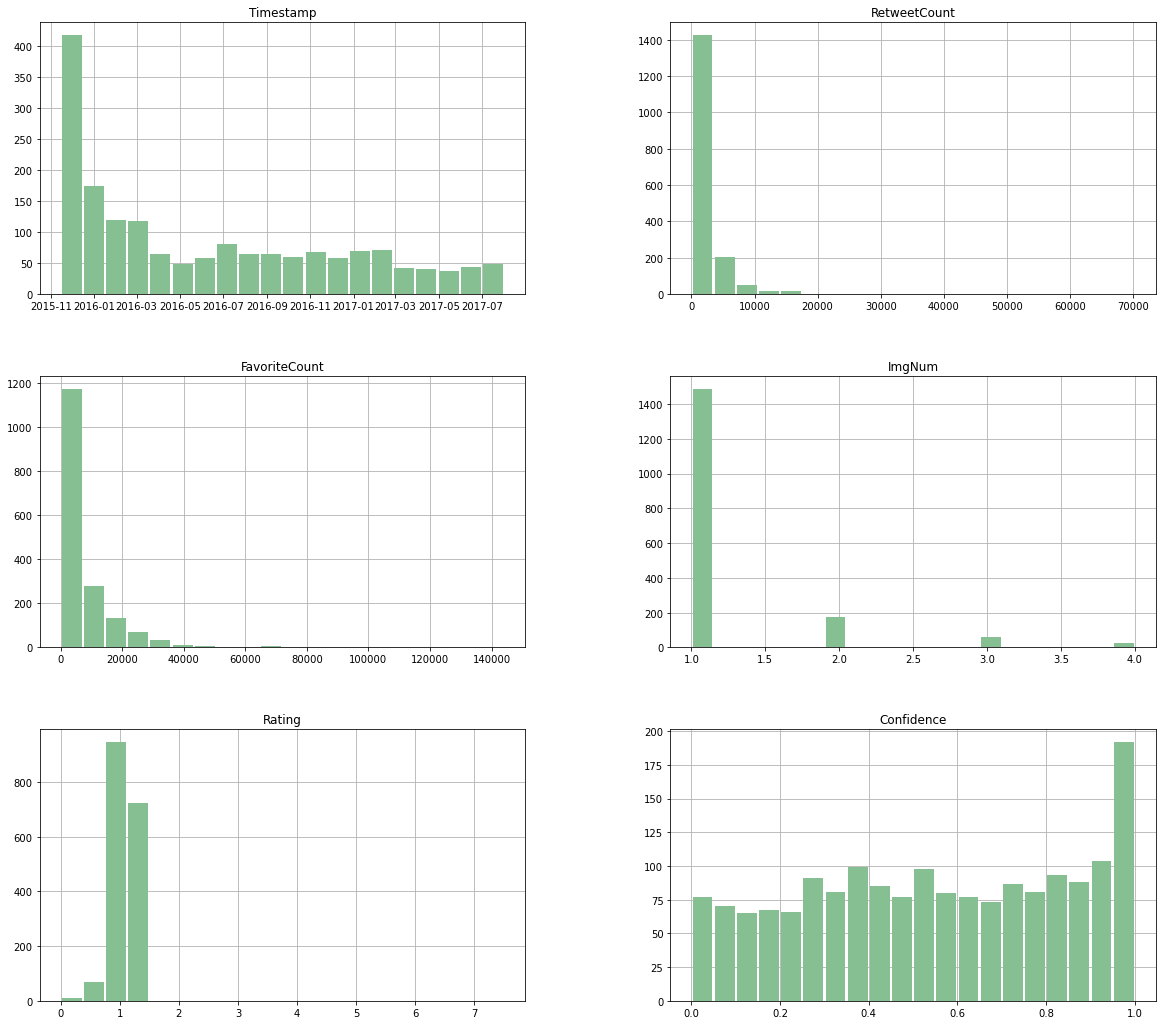

In [102]:
df_merged3.hist(figsize=(20,18),bins=20, grid=True, color='#86bf91', zorder=2, rwidth=0.9)
#ax = ax[0]

def hist_plot():
    for x in ax:
        x.spines['right'].set_visible(False)
        x.spines['top'].set_visible(False)
        x.spines['left'].set_visible(False)

    # Switch off ticks
        x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
        vals = x.get_yticks()
        for tick in vals:
            x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
            
    # Format y-axis label
        x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
        ax = plt.subplot(1,1,1)
        ax.hist(x)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        plt.show()


### 1. Which breeds of Dogs received the highest retweet counts?

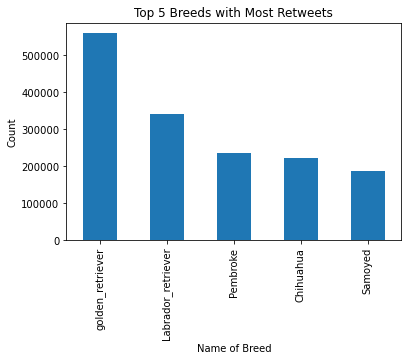

In [103]:
b_mostretweets = df_merged3.groupby('Breed')['RetweetCount'].sum().sort_values(ascending=False)[:5]
b_mostretweets.plot(kind='bar')
plt.title('Top 5 Breeds with Most Retweets')
plt.ylabel('Count')
plt.xlabel('Name of Breed');

In [104]:
b_mostretweets

Breed
golden_retriever      560986.0
Labrador_retriever    340420.0
Pembroke              235425.0
Chihuahua             223145.0
Samoyed               187996.0
Name: RetweetCount, dtype: float64

<div class="alert alert-block alert-info">
<b>Insight 1:</b> The Golden retriever, Labrador retriever, Pembroke, Chihuahua and Samoyed breeds had the top 5 highest retweet counts in that respective order.
</div>

### 2. Which breeds of Dogs received the highest favorite counts?

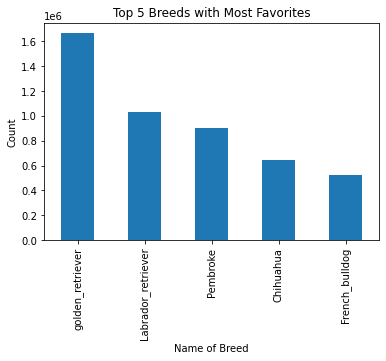

In [105]:
b_mostfavorites = df_merged3.groupby('Breed')['FavoriteCount'].sum().sort_values(ascending=False)[:5]
b_mostfavorites.plot(kind='bar')
plt.title('Top 5 Breeds with Most Favorites')
plt.ylabel('Count')
plt.xlabel('Name of Breed');

In [106]:
b_mostfavorites

Breed
golden_retriever      1667765.0
Labrador_retriever    1034079.0
Pembroke               901211.0
Chihuahua              648676.0
French_bulldog         523533.0
Name: FavoriteCount, dtype: float64

<div class="alert alert-block alert-info">
<b>Insight 2:</b> The Golden retriever, Labrador retriever, Pembroke, Chihuahua and French bulldog breeds had the top 5 highest favorite counts in that respective order.
</div>

### 3. Which breed of dogs received the lowest retweets counts?

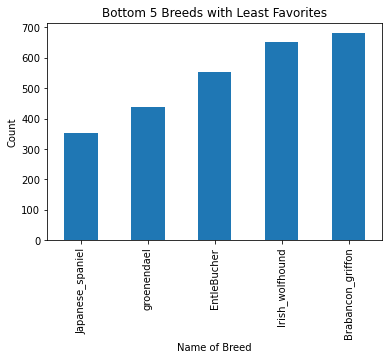

In [107]:
b_lowretweets = df_merged3.groupby('Breed')['RetweetCount'].sum().sort_values(ascending=True)[:5]
b_lowretweets.plot(kind='bar')
plt.title('Bottom 5 Breeds with Least Favorites')
plt.ylabel('Count')
plt.xlabel('Name of Breed');

In [108]:
b_lowretweets

Breed
Japanese_spaniel     354.0
groenendael          437.0
EntleBucher          553.0
Irish_wolfhound      651.0
Brabancon_griffon    682.0
Name: RetweetCount, dtype: float64

<div class="alert alert-block alert-info">
<b>Insight 3:</b> The Japanese Spaniel, Groenendael, EntleBucher, Irish Wolfhound and Brabancon Griffon breeds had the top 5 lowest retweet counts in that respective order.
</div>


### 4. Which breeds of Dogs received the lowest favorites counts?

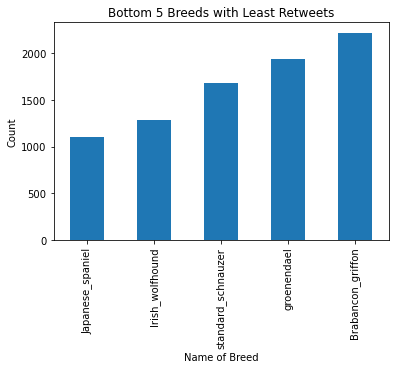

In [109]:
b_lowfavorites = df_merged3.groupby('Breed')['FavoriteCount'].sum().sort_values(ascending=True)[:5]
b_lowfavorites.plot(kind='bar')
plt.title('Bottom 5 Breeds with Least Retweets')
plt.ylabel('Count')
plt.xlabel('Name of Breed');

In [110]:
b_lowfavorites

Breed
Japanese_spaniel      1108.0
Irish_wolfhound       1282.0
standard_schnauzer    1679.0
groenendael           1943.0
Brabancon_griffon     2219.0
Name: FavoriteCount, dtype: float64

<div class="alert alert-block alert-info">
<b>Insight 4:</b> The Brabancon Griffon, Groenendael, Standard Schnauzer,Irish Wolfhound and Japanese Spaniel breeds were the five least favorited breeds.
</div>


### 5. Which are the top three breeds of dogs got the average highest retweet counts?

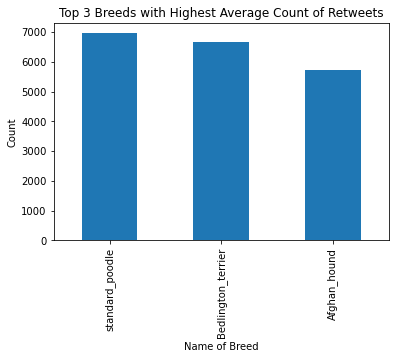

In [111]:
b_avgRetweets = df_merged3.groupby('Breed')['RetweetCount'].mean().sort_values(ascending=False)[:3]
b_avgRetweets.plot(kind='bar')
plt.title('Top 3 Breeds with Highest Average Count of Retweets')
plt.ylabel('Count')
plt.xlabel('Name of Breed');

In [112]:
b_avgRetweets

Breed
standard_poodle       6953.916667
Bedlington_terrier    6646.500000
Afghan_hound          5707.000000
Name: RetweetCount, dtype: float64

<div class="alert alert-block alert-info">
<b>Insight 5:</b> The Standard Poodle, Bedlington Terrier and  Afghan Hound breeds were the three most averaged retweeted breeds in that respective order.
</div>

### 6. Top Dog Names

In [113]:
df_merged3.Name.value_counts().sort_values(ascending=False)[:5]

none       522
Lucy        10
Tucker      10
Cooper      10
Charlie     10
Name: Name, dtype: int64

<div class="alert alert-block alert-info">
<b>Insight 6:</b> Tucker, Cooper, Lucy and Charlie were the most frequent names of the posted dogs.
</div>

### 7. Dog Stage 

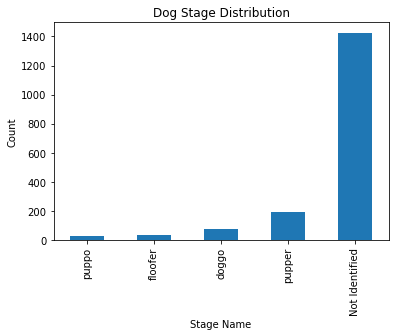

In [114]:
d_stage = df_merged3.Stage.value_counts().sort_values(ascending=True)
d_stage.plot(kind='bar')
plt.title('Dog Stage Distribution')
plt.ylabel('Count')
plt.xlabel('Stage Name');

<div class="alert alert-block alert-info">
<b>Insight 7:</b> Majority of the dogs were in the Pupper stage while the least were in the Puppo stage. Please note, the majority of the dogs' stages remained unidentified.
</div>

### 8. Is there a correlation between ratings, retweet and favorite counts?

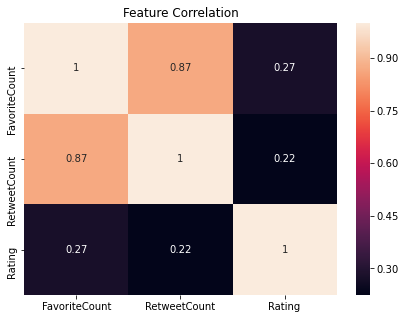

In [115]:
rrf_corr = df_merged3[['FavoriteCount','RetweetCount','Rating']].corr()
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(rrf_corr,annot=True,ax=ax)
plt.title('Feature Correlation');

<div class="alert alert-block alert-info">
<b>Insight 8:</b> There is a very high correlation between Retweet and Favorite count. On the other hand there is a very low correlation between Rating and these two other features.
</div>

### 9. On which day did posts receive the highest activity?

In [116]:
df_activity = df_merged3.groupby(["TweetDay"],as_index=False)["RetweetCount", "FavoriteCount"].sum()
df_activity.sort_values(by=["RetweetCount"], ascending = False).head(7)

/var/folders/rg/fbkfsqpd1dx3_sq7w45ylk1w0000gp/T/ipykernel_1287/482605420.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_activity = df_merged3.groupby(["TweetDay"],as_index=False)["RetweetCount", "FavoriteCount"].sum()


,TweetDay,RetweetCount,FavoriteCount
6,Wed,701898.0,2074184.0
1,Mon,652447.0,2109129.0
5,Tue,608598.0,2010905.0
0,Fri,583752.0,1878435.0
2,Sat,552511.0,1725696.0
4,Thu,536001.0,1763932.0
3,Sun,499004.0,1731370.0


<div class="alert alert-block alert-info">
<b>Insight 9:</b> Wednesday had the highest activities on posts made while Sunday had the lowest.
</div>

### 10. Source Distribution

In [117]:
df_merged3.Source.value_counts()

Twitter for iPhone     1719
Twitter Web Client       23
TweetDeck                 9
Vine - Make a Scene       0
Name: Source, dtype: int64

<div class="alert alert-block alert-info">
<b>Insight 10:</b> Majority of posts were made through the Twitter for iPhone while the least were made through Vine.
</div>

### 11. Distribution of Favorites and Retweets by Stage

/var/folders/rg/fbkfsqpd1dx3_sq7w45ylk1w0000gp/T/ipykernel_1287/1463074864.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  s_fav = df_merged3.groupby(['Stage'])['FavoriteCount','RetweetCount'].sum().sort_values(by='FavoriteCount',ascending=True)


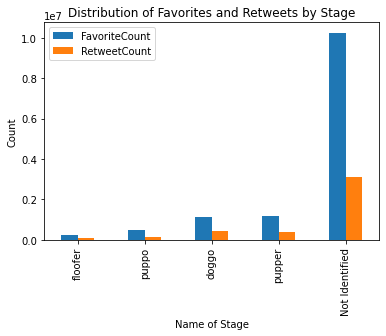

In [118]:
s_fav = df_merged3.groupby(['Stage'])['FavoriteCount','RetweetCount'].sum().sort_values(by='FavoriteCount',ascending=True)
s_fav.plot(kind='bar')
plt.title('Distribution of Favorites and Retweets by Stage')
plt.ylabel('Count')
plt.xlabel('Name of Stage');

In [119]:
s_fav

,FavoriteCount,RetweetCount
Stage,,
floofer,251264.0,79607.0
puppo,488862.0,131907.0
doggo,1124475.0,427160.0
pupper,1180133.0,376327.0
Not Identified,10248917.0,3119210.0


<a id='conclusions'></a>
## Conclusions

If you are going to make a dog post for purposes of getting high ratings in relation to WeRateDogs Twitter Account, you have a better chance if you post on Wednesday. There is a lot of retweeting and favoriting activity on this day. 

Majority of the posts were made through Twitter for iPhone, meaning majority of the users were iPhone owners. This also brings an interesting question on why other mobile platforms are not visible on this list of sources.

Looking at the correlations between retweet and favoriting, we can see there is a very high chance of a post favorited being retweeted and vice versa. Also to note, rating minimally affects the possibility of retweet or favorite of a post.

The dog stage with the most favorites and retweets is the puppy.

<a id='limitations'></a>
## Limitations

The sample dataset provided is not sizeable enough, more data is needed as in this case was working with about 2300 rows of data.

A portion of the data was deleted, proved impossible to retrieve.

<a id='references'></a>
## References

[TweepError attribute error when using Tweepy](https://stackoverflow.com/questions/68412800/tweeperror-attribute-error-when-using-tweepy)

[Markdown for Jupyter notebooks cheatsheet](https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet)

[Five ways to use value_counts](https://www.kaggle.com/code/parulpandey/five-ways-to-use-value-counts/notebook)

[Python Data Structures](https://corporatefinanceinstitute.com/resources/knowledge/other/python-data-structures/#:~:text=The%20basic%20Python%20data%20structures,based%20on%20mutability%20and%20order.)

[pandas.DataFrame.sort_values](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)

[How to reference a IPython notebook cell in markdown?](https://stackoverflow.com/questions/28080066/how-to-reference-a-ipython-notebook-cell-in-markdown)